In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline#引入正则化
from sklearn.preprocessing import StandardScaler#数据标准化 / 归一化的作用 提升模型精度
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
iris=load_iris()

D:\Anaconda\lib\site-packages\sklearn\datasets\base.py:239: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
D:\Anaconda\lib\site-packages\sklearn\datasets\base.py:243: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

In [3]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(iris.data,iris.target,test_size=0.3,random_state =23)

In [4]:
data = pd.DataFrame(Xtrain, columns= iris.feature_names)
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,105.000000,105.000000,105.000000,105.000000
mean,5.853333,3.027619,3.847619,1.243810
std,0.825328,0.440388,1.754231,0.752167
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.500000,1.400000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.3,2.5,5.0,1.9
1,4.9,2.5,4.5,1.7
2,7.9,3.8,6.4,2.0
3,4.9,3.1,1.5,0.1
4,5.7,2.8,4.1,1.3
...,...,...,...,...
100,5.1,3.4,1.5,0.2
101,6.1,3.0,4.6,1.4
102,5.4,3.4,1.5,0.4
103,5.0,3.5,1.3,0.3


In [18]:
#高斯朴素贝叶斯分类模型
clf1=GaussianNB().fit(Xtrain,Ytrain)
clf1

GaussianNB(priors=None)

In [7]:
Ypred1 = clf1.predict(Xtest)
print("Ypred1:",Ypred1)
print("acc1:",metrics.accuracy_score(Ytest, Ypred1))
print("precision1:",metrics.precision_score(Ytest, Ypred1,average=None))
print("recall-1:",metrics.recall_score(Ytest, Ypred1,average=None))
print("f1-1:",metrics.f1_score(Ytest, Ypred1,average=None))
metrics.confusion_matrix(Ytest, Ypred1)

Ypred1: [2 2 1 0 2 2 0 2 0 1 1 0 2 0 0 1 1 1 2 0 2 0 0 0 2 0 0 2 1 1 0 1 0 2 0 0 1
 1 1 2 2 0 1 0 1]
acc1: 0.9555555555555556
precision1: [1.         0.92857143 0.92307692]
recall-1: [1.         0.92857143 0.92307692]
f1-1: [1.         0.92857143 0.92307692]


array([[18,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 12]], dtype=int64)

In [8]:
#多项分布朴素贝叶斯分类模型
clf2=MultinomialNB().fit(Xtrain,Ytrain)
Ypred2 = clf2.predict(Xtest)
print("Ypred2:",Ypred2)
print("acc2:",metrics.accuracy_score(Ytest, Ypred2))
print("precision2:",metrics.precision_score(Ytest, Ypred2,average=None))
print("recall-2:",metrics.recall_score(Ytest, Ypred2,average=None))
print("f1-2:",metrics.f1_score(Ytest, Ypred2,average=None))
metrics.confusion_matrix(Ytest, Ypred2)

Ypred2: [2 2 1 0 2 1 0 2 0 1 1 0 2 0 0 2 1 1 2 0 2 0 0 0 2 0 0 2 1 1 0 1 0 2 0 0 1
 1 1 2 2 0 1 0 1]
acc2: 1.0
precision2: [1. 1. 1.]
recall-2: [1. 1. 1.]
f1-2: [1. 1. 1.]


array([[18,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 13]], dtype=int64)

In [9]:
#伯努利朴素贝叶斯分类模型
#clf3=BernoulliNB()
clf3= make_pipeline(StandardScaler(),BernoulliNB()).fit(Xtrain, Ytrain)#正则化提高精度
Ypred3 = clf3.predict(Xtest)
print("Ypred3:",Ypred3)
print("acc3:",metrics.accuracy_score(Ytest, Ypred3))
print("precision3:",metrics.precision_score(Ytest, Ypred3,average=None))
print("recall-3:",metrics.recall_score(Ytest, Ypred3,average=None))
print("f1-3:",metrics.f1_score(Ytest, Ypred3,average=None))
metrics.confusion_matrix(Ytest, Ypred3)

Ypred3: [2 2 1 0 1 2 0 2 0 1 1 0 2 0 0 2 2 2 2 0 2 0 0 0 2 0 0 2 2 1 0 1 0 2 0 0 2
 0 1 2 2 0 0 0 2]
acc3: 0.8
precision3: [0.9        0.85714286 0.66666667]
recall-3: [1.         0.42857143 0.92307692]
f1-3: [0.94736842 0.57142857 0.77419355]


array([[18,  0,  0],
       [ 2,  6,  6],
       [ 0,  1, 12]], dtype=int64)

In [10]:
import matplotlib.pyplot as plt
#Matplotlib的基于状态的接口。提供了一种类似于matlab 的绘图方法

In [11]:
def make_meshgrid(x, y, h=.02):#生成绘制3D图形所需的网格数据
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [12]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [13]:
# Take two features. We could avoid this by using a two-dim dataset
X = iris.data[:, 0:2]#取二维数组中第3维到第4维的所有特征数据
y = iris.target
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [14]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (GaussianNB(),MultinomialNB(),make_pipeline(StandardScaler(),BernoulliNB()))
models = (clf.fit(X, y)for clf in models)

In [15]:
# title for the plots
titles = ('GaussianNB',
          'MultinomialNB',
          'BernoulliNB')

In [16]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.3,2.5,5.0,1.9
1,4.9,2.5,4.5,1.7
2,7.9,3.8,6.4,2.0
3,4.9,3.1,1.5,0.1
4,5.7,2.8,4.1,1.3
...,...,...,...,...
100,5.1,3.4,1.5,0.2
101,6.1,3.0,4.6,1.4
102,5.4,3.4,1.5,0.4
103,5.0,3.5,1.3,0.3


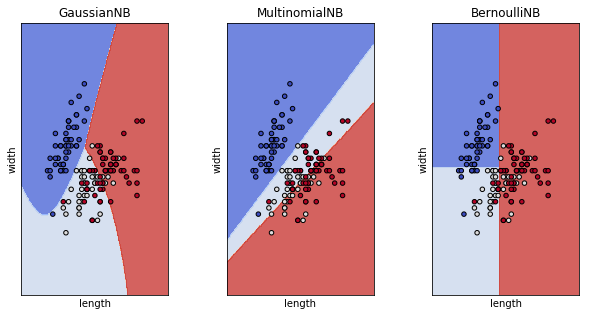

In [17]:
fig,sub = plt.subplots(1, 3, figsize=(10, 5))#wspace、hspace分别表示子图之间左右、上下的间距
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('length')
    ax.set_ylabel('width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()